# <b>Unsupervised Learning Week: Clustering</b>

**Goals**

- Clustering. What is it? Why is it used? What makes it qualify as unsupervised learning.
- KMeans: The most popular clustering algorithm. How to use KMeans with Sklearn. 
- How to evaluate KMeans using Sklearn.
- In class workshop: pick a dataset and do some clustering!!

## What is clustering? What is unsupervised learning?

In [2]:
#machine learning where there are no labels. We're not predicting a true or false. 

In [3]:
#we use it to find structure of our dataset

## Clustering

Clustering comes natural to humans. We categorize each others, things, and other phenomenon all the time i.e. Millennials vs Generation X vs Boomers and Tudor vs Hacienda vs Contemporary houses. Categorizing helps us better understand things; if you tell me a certain person or thing belongs to a certain label, then I immediately gain a better understanding of their or its purpose.
<br><br>
What do you think are real world applications of clustering? Why would this be valuable to a business?
<br><br>
"Clustering is a technique for finding similarity groups in a data, called clusters. It attempts to group individuals in a population together by similarity, but not driven by a specific purpose." http://bigdata-madesimple.com/possibly-the-simplest-way-to-explain-k-means-algorithm/
<br><br>
<b>CLUSTERING IS UNSUPERVISED LEARNING BECAUSE THERE ARE NO LABELS LIKE IN SUPERVISED LEARNING. THE POINT OF CLUSTERING IS TO GENERATE NEW LABELS FROM UNLABELLED DATA<b>

In [4]:
#Imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
plt.style.use("fivethirtyeight")

In [5]:
#Make fake data to visualize
data = make_blobs(n_samples=250, centers = 4, cluster_std=.75, random_state=4)[0]

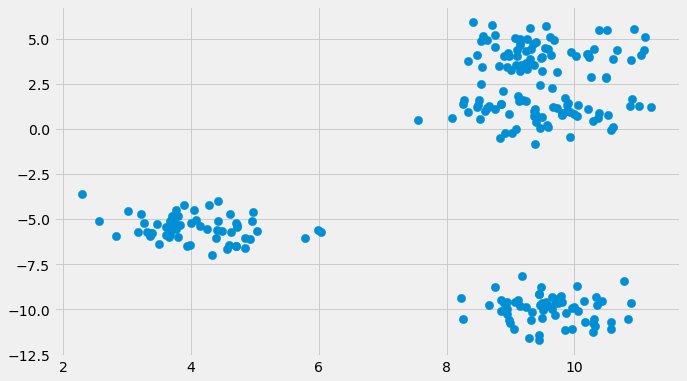

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s=68);

### How many clusters do you see?

In [7]:
#There are no right answers. Could be 3 or 4.. or more!

Clustering is usually never this easy. Let's look at some more difficult data.

In [8]:
#Make fake data
data = make_classification(n_samples=400, n_features=2,n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, random_state=1)[0]

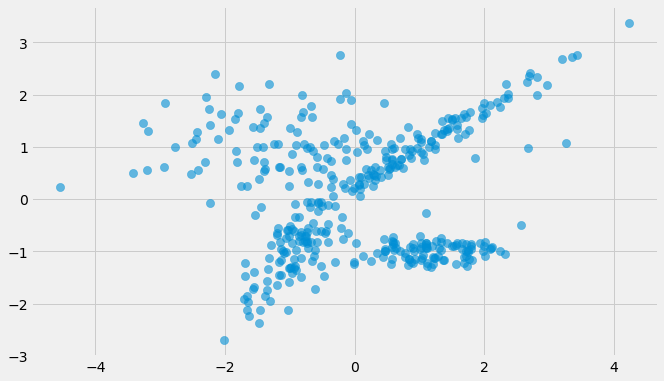

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s=68, alpha=.6);

## KMeans Algorithm

- The most popular clustering algorithm
- K in Kmeans stands for the number of clusters and centriods predetermined by you the data scientist.
- Centriods are the center point of each cluster. The average of all of the points in the cluster, hence the means in kmeans.
- A point is assigned to the cluster of the centriod it is closest to.
- Algorithms works by randomly assigning centriods within the data and shifts the centriods until they reach convergence.
- Basically means the algorithm keeps going until it finds the smallest value produced by this function:
$$∑(x¯c−xi)^2$$
<br><br>
### KMeans in action

![a](http://stanford.edu/~cpiech/cs221/img/kmeansViz.png)

Interactive version:

http://stanford.edu/class/ee103/visualizations/kmeans/kmeans.html

**Things to keep in mind**

- Needs features on the same or similar scales to be effective. 

- Vulnerable to noise from too many features and multicollinearity.

- Assumes a linear boundary between clusters, which is not always the case as we're about to see.

In [10]:
#need to scale the data!

In [11]:
#not always the case that there's a linear boundary. 

### Clustering Time

We're going to use KMeans to cluster different forms of data to demonstrate how abilities and limitations of KMeans.

Let's bring back the blobs and use KMeans on it.

In [12]:
data

array([[ 1.96483605,  1.73695657],
       [ 1.77127137,  1.66217648],
       [ 0.47681872,  0.7975874 ],
       [-1.57678047, -1.7224858 ],
       [-0.72243802, -0.92674432],
       [ 0.28797535,  0.47186696],
       [-0.72358704, -0.55813827],
       [ 1.02442104, -1.15773151],
       [-1.14993489, -0.82763673],
       [-1.32851012,  2.19379939],
       [-0.4384222 , -0.60425652],
       [-1.3371426 , -1.34525545],
       [ 1.24455975,  1.03674395],
       [-0.23231695,  2.7464955 ],
       [ 1.71260529, -0.99044673],
       [ 1.99565625,  1.83494922],
       [-1.03321684, -0.58275473],
       [-0.25521131,  1.05696238],
       [ 0.73956802,  0.59903824],
       [-0.07516927,  0.35682325],
       [-0.56888216,  0.28760113],
       [ 1.0437607 , -1.12056631],
       [ 1.97164906, -0.98703083],
       [-0.85424592, -0.81028311],
       [ 1.79059149, -0.90015236],
       [-1.00474365, -0.52323436],
       [-0.33430228,  0.05567015],
       [-0.05146278,  1.90284242],
       [-0.90743738,

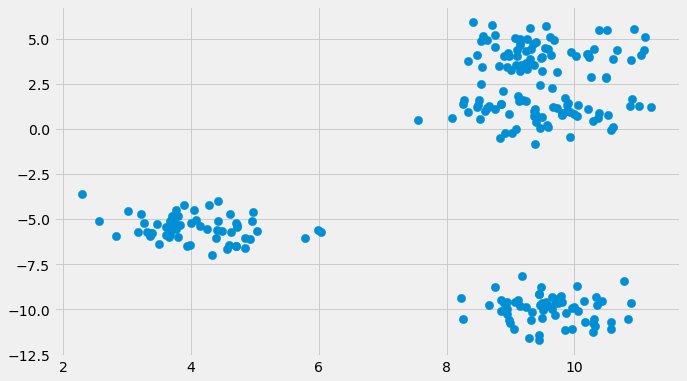

In [13]:
#Make fake data to visualize
data = make_blobs(n_samples=250, centers = 4, cluster_std=.75, random_state=4)[0]

plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s=68);

In [14]:
#Intialize the KMeans algorithm with 3 clusters
km3 = KMeans(n_clusters= 3)

#Fit model on data
km3.fit(data)

#Get the labels
labels = km3.labels_

labels

array([2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1,
       1, 0, 2, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 1, 2, 2, 0, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 2, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 1, 2, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 2, 0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0, 0, 1, 2, 1, 2, 1, 1, 1,
       2, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1,
       0, 1, 0, 1, 0, 2, 2, 0, 1, 1, 2, 1, 0, 2, 2, 1, 0, 1, 2, 2, 2, 1, 1,
       0, 0, 2, 2, 2, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0], dtype=int32)

In [15]:
#The counts of labels
pd.value_counts(labels)

1    126
2     62
0     62
dtype: int64

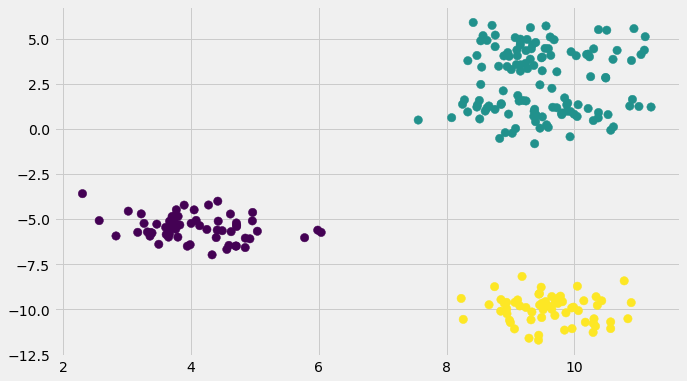

In [16]:
#Visualize the data with the color-encoded labels

plt.figure(figsize=(10, 6))
plt.scatter(data[:,0], data[:,1], s = 70, c = labels)

Is this what you expected?


In [17]:
#yes!

Centriods: The center point of each cluster. Equivalent to the average of the attributes for each label

Let's replot the above chart but with the centriods.

In [18]:
#Centriod values
centroids = km3.cluster_centers_
centroids

array([[ 4.07638897, -5.47320984],
       [ 9.47719408,  2.61510626],
       [ 9.61095813, -9.97869912]])

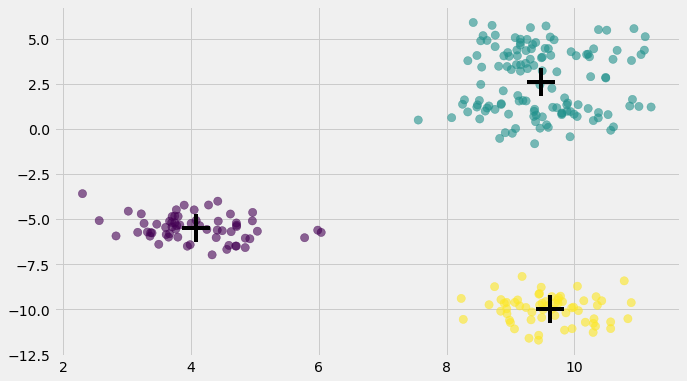

In [19]:
#Visualize the data with the color-encoded labels along with the centriods

plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s=68, c=labels, alpha= .6)
plt.scatter(centroids[ : , 0], centroids[ : , 1], s = 800, marker="+", c = "black")
plt.show();

Let's try it again with four clusters

In [20]:
#Intialize the KMeans algorithm with 4 clusters

km4 = KMeans(n_clusters=4)

#Fit model on data
km4.fit(data)

#Get the labels

labels = km4.labels_

labels

array([1, 2, 3, 3, 1, 0, 0, 0, 3, 2, 3, 1, 1, 1, 2, 0, 2, 3, 1, 2, 3, 2, 3,
       3, 2, 1, 3, 2, 0, 0, 2, 0, 2, 2, 2, 0, 3, 2, 0, 3, 3, 1, 3, 0, 1, 0,
       3, 1, 1, 0, 1, 1, 2, 0, 2, 1, 3, 1, 3, 2, 0, 3, 3, 2, 3, 1, 3, 1, 1,
       3, 2, 1, 0, 2, 1, 0, 2, 1, 1, 3, 0, 2, 3, 1, 0, 1, 0, 2, 2, 3, 0, 0,
       3, 2, 0, 1, 3, 3, 1, 0, 3, 0, 1, 3, 2, 2, 3, 3, 3, 0, 0, 2, 1, 1, 3,
       2, 0, 0, 0, 0, 2, 3, 3, 2, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 3, 3, 1, 2, 2, 2, 1, 0, 3, 2, 0, 2, 3, 3, 0, 2, 3, 3, 2,
       2, 2, 3, 3, 1, 0, 1, 3, 3, 3, 3, 1, 1, 0, 2, 2, 0, 1, 3, 1, 3, 3, 0,
       1, 1, 2, 0, 3, 3, 2, 3, 2, 2, 3, 0, 2, 3, 2, 0, 0, 3, 2, 0, 2, 1, 0,
       2, 0, 2, 3, 2, 1, 1, 2, 0, 0, 1, 0, 2, 1, 1, 3, 2, 0, 1, 1, 1, 3, 0,
       2, 2, 1, 1, 1, 0, 2, 1, 0, 3, 3, 0, 0, 1, 0, 1, 0, 2, 3, 2], dtype=int32)

In [21]:
#The counts of labels
pd.value_counts(labels)

3    63
0    63
2    62
1    62
dtype: int64

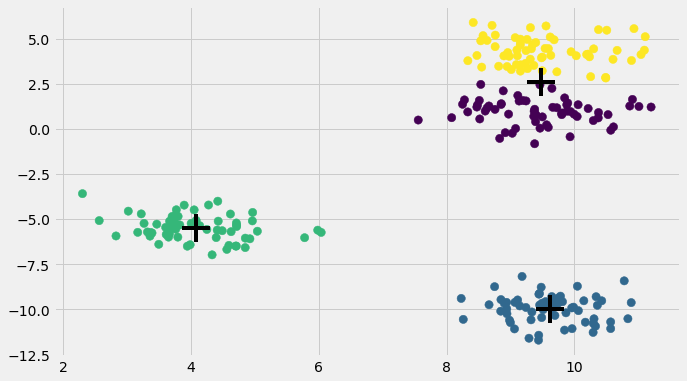

In [22]:
#Visualization
plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s=68, c=labels)
plt.scatter(centroids[ : , 0], centroids[ : , 1], s = 800, marker="+", c = "black")
plt.show();

Does this change your answer to the "How many clusters do you see?" question.

Cluster the random data from earlier

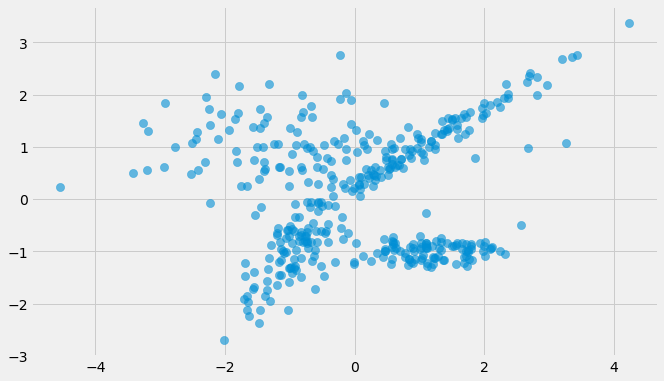

In [23]:
#Make fake data
data = make_classification(n_samples=400, n_features=2,n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, random_state=1)[0]

#Visualize
plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s=68, alpha=.6);

What cluster value should we set?

In [24]:
#Intialize the KMeans algorithm with N clusters
km4 = KMeans(n_clusters= 4)


#Fit model on data
km4.fit(data)

#Get the labels
labels = km4.labels_


#Assign centriods
cents = km4.cluster_centers_


#Values counts of labels
pd.value_counts(labels)

0    120
1    113
3     92
2     75
dtype: int64

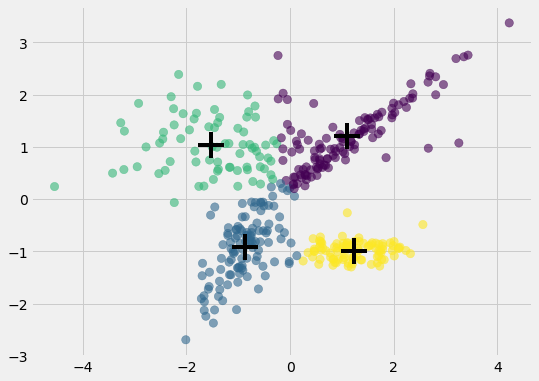

In [25]:
#Visualize color-encoded data

plt.figure(figsize= (8, 6))
plt.scatter(data[:,0], data[:,1], c = labels, s = 70, alpha= .6)
plt.scatter(cents[:, 0], cents[:,1], c = "black", marker = "+", s = 700);

Is this what you expected?

In [26]:
cents

array([[ 1.09651767,  1.19962654],
       [-0.86170917, -0.91912896],
       [-1.51646699,  1.02549802],
       [ 1.23000218, -0.98376827]])

In [27]:
#some clusters are better than others. What about the performance of the clusters themselves?

#what about the limitations of kmeans?? See below...

Let's try this on "moons" data.

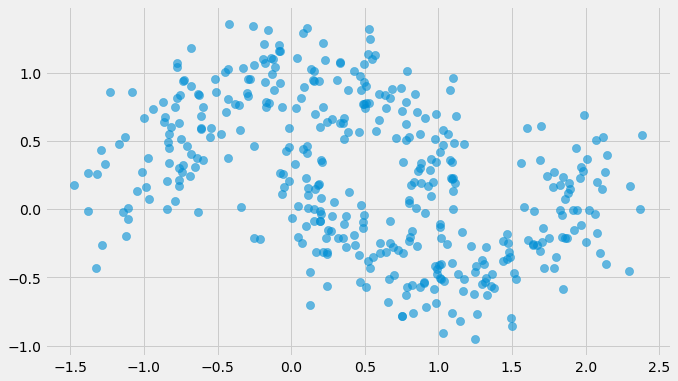

In [28]:
#Make moon data

data = make_moons(n_samples=400, noise=.2)[0]

#Visualize
plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s=68, alpha=.6);

Cluster with 2 clusters

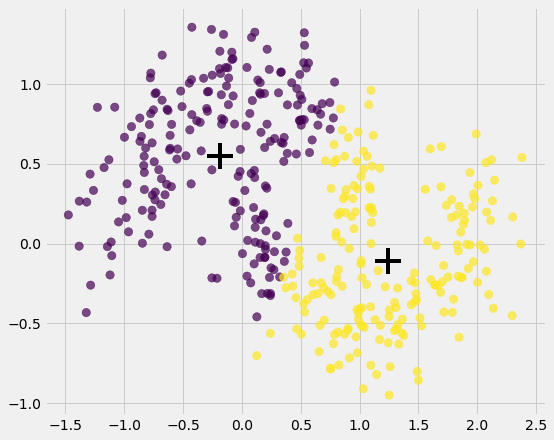

In [29]:
#Intialize the KMeans algorithm with 2 clusters
km2 = KMeans(n_clusters= 2)


#Fit model on data
km2.fit(data)

#Get the labels
labels = km2.labels_


#Centriods
cents = km2.cluster_centers_



#Visualize color-encoded data
plt.figure(figsize = (8,7))
plt.scatter(data[:,0], data[:,1], c = labels, s = 70, alpha = .7)
plt.scatter(cents[:,0], cents[:,1], c = "black", marker = "+", s = 700)
plt.show;

How do you rate the results of this clustering algorithm?

In [30]:
#kmeans fails the eye test... 

Let's use KMeans on "circles"

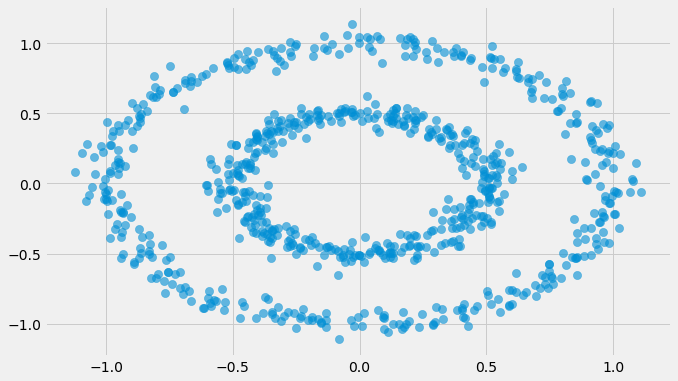

In [31]:
#Make circles data

data = make_circles(n_samples=800, noise=.05, factor=0.5)[0]

#Visualize
plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s=68, alpha=.6);

In [32]:
#what does the eye test tell us? 

In [33]:
#inner and outer circle makes up 2?

How do you think this data will interact with KMeans?

In [34]:
#let's try with 2 clusters first

Let's find out.

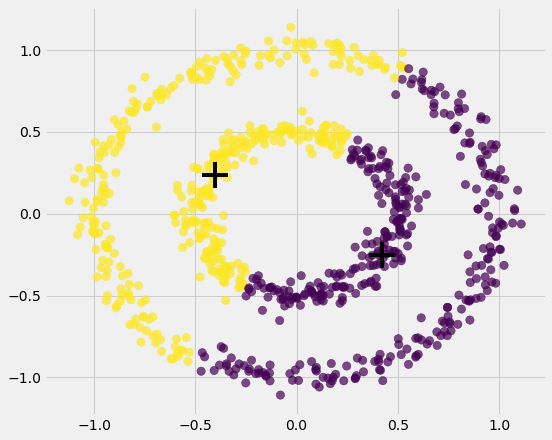

In [35]:
#Intialize the KMeans algorithm with 2 clusters

km2 = KMeans(n_clusters= 2)

#Fit model on data
km2.fit(data)

#Get the labels
labels = km2.labels_


#Centriods
cents = km2.cluster_centers_


#Visualize color-encoded data
plt.figure(figsize = (8, 7))
plt.scatter(data[:,0], data[:,1], c = labels, s = 70, alpha = .7)
plt.scatter(cents[:,0], cents[:,1], c = "black", marker = "+", s = 700)
plt.show;

Does this match your expectation?

In [36]:
#no, it did not cluster the inner and outer circles!

In [37]:
#hierchiral clusters
#DB Scan is good for finding outliers (Density Base, would be good for the Moon Dataset)

KMeans is great but not it's not perfect, there's other algorithm that are better clustering the the types of data KMean is not good at clustering.

<br>

Now let's use KMeans on real world data.

## Clustering Country Data

<br>

- In this section we're going to use KMeans to cluster countries based on their socio-economic attributes such as unemployment, electricity, and infant mortality.

- How to evaluate clusters using the elbow method and silhouette score

- Scaling features improves results

In [38]:

path = "../data/country_development_data.pkl"

#Load in data and assign it to df
df = pd.read_pickle(path)

#Look at first five rows
df.head()

IndicatorCode,Access to electricity (% of population),Renewable electricity output (% of total electricity output),CO2 emissions (metric tons per capita),"Commercial bank branches (per 100,000 adults)",Depth of credit information index (0=low to 8=high),Strength of legal rights index (0=weak to 12=strong),Mobile cellular subscriptions (per 100 people),Internet users (per 100 people),GDP per capita (current US$),Proportion of seats held by women in national parliaments (%),...,Health expenditure per capita (current US$),"Labor force, female (% of total labor force)","Unemployment, total (% of total labor force)",Net migration,"Mortality rate, infant (per 1,000 live births)","Life expectancy at birth, total (years)","Survival to age 65, female (% of cohort)","Population, ages 0-14 (% of total)","Age dependency ratio, young (% of working-age population)",Urban population (% of total)
CountryName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,43.0,0.000000,0.425262,2.465221,0.0,9.0,74.882842,6.39,633.569247,27.710843,...,54.964148,16.051439,9.1,473007,66.3,60.028268,60.48056,44.870996,85.153384,26.282
Albania,100.0,100.000000,1.607038,22.241690,6.0,7.0,105.469966,60.10,4564.390339,20.714286,...,239.577092,41.266475,16.1,-91750,12.5,77.537244,90.56197,18.930427,27.432462,56.409
Algeria,100.0,1.083680,3.316038,5.064181,0.0,2.0,93.310750,18.09,5484.066806,31.601732,...,313.520212,17.376156,9.5,-143268,21.9,74.568951,85.02157,28.205909,42.742285,70.129
Angola,37.0,70.906823,1.354008,12.863257,0.0,1.0,63.479208,21.26,5900.529570,36.818182,...,267.224299,46.204554,6.8,102322,96.0,51.866171,49.09112,47.850317,96.005760,43.274
Argentina,99.8,23.769069,4.562049,13.303817,8.0,2.0,158.735762,64.70,12509.531118,36.186770,...,1074.066944,40.431360,8.2,30000,11.1,75.986098,87.23494,25.346427,39.700196,91.604


In [39]:
#Shape

df.shape

(159, 21)

159 countries and 21 attributes.

In [40]:
#Look at columns
df.columns

Index([u'Access to electricity (% of population)',
       u'Renewable electricity output (% of total electricity output)',
       u'CO2 emissions (metric tons per capita)',
       u'Commercial bank branches (per 100,000 adults)',
       u'Depth of credit information index (0=low to 8=high)',
       u'Strength of legal rights index (0=weak to 12=strong)',
       u'Mobile cellular subscriptions (per 100 people)',
       u'Internet users (per 100 people)', u'GDP per capita (current US$)',
       u'Proportion of seats held by women in national parliaments (%)',
       u'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)',
       u'Health expenditure per capita (current US$)',
       u'Labor force, female (% of total labor force)',
       u'Unemployment, total (% of total labor force)', u'Net migration',
       u'Mortality rate, infant (per 1,000 live births)',
       u'Life expectancy at birth, total (years)',
       u'Survival to age 65, 

In [41]:
#Rename cols to make things easier

new_cols = ["electric_accces", "renewables_percent", "co2_emissions", "commercial_bank",
           "credit_information_index_depth", "legal_rights", "cell_phone_usage",
           "internet_users","gdp_per_cap", "women_politicians", "communicable_disease_rate", "health_per_cap",
           "female_labor_rate", "unemploy_rate", "net_migration", "mortality_rate", "life_exp",
           "female_survival_65", "child_popul", "age_depend_ratio", "urban_pop"]
df.columns = new_cols
df.columns

Index([u'electric_accces', u'renewables_percent', u'co2_emissions',
       u'commercial_bank', u'credit_information_index_depth', u'legal_rights',
       u'cell_phone_usage', u'internet_users', u'gdp_per_cap',
       u'women_politicians', u'communicable_disease_rate', u'health_per_cap',
       u'female_labor_rate', u'unemploy_rate', u'net_migration',
       u'mortality_rate', u'life_exp', u'female_survival_65', u'child_popul',
       u'age_depend_ratio', u'urban_pop'],
      dtype='object')

Let's pick 5 - 7 of the 21 attributes to work with. Attributes need to be fairly different from one another.

In [42]:
#Creat subset list of columns
subset = ['gdp_per_cap', 'life_exp', 'urban_pop', 'net_migration', 'legal_rights', 'unemploy_rate', u'internet_users']

df2 = df[subset].copy()

df2.head()

,gdp_per_cap,life_exp,urban_pop,net_migration,legal_rights,unemploy_rate,internet_users
CountryName,,,,,,,
Afghanistan,633.569247,60.028268,26.282,473007,9.0,9.1,6.39
Albania,4564.390339,77.537244,56.409,-91750,7.0,16.1,60.10
Algeria,5484.066806,74.568951,70.129,-143268,2.0,9.5,18.09
Angola,5900.529570,51.866171,43.274,102322,1.0,6.8,21.26
Argentina,12509.531118,75.986098,91.604,30000,2.0,8.2,64.70


Let's cluster the countries using 2, 3, and 5 clusters

2 Clusters:

In [43]:
#Make a copy of df2 and assign it to X

X = df2.copy()

#Intialize kmeans with 2 clusters and random_state = 10
km2 = KMeans(n_clusters= 2, random_state= 10)

#Fit model on X
km2.fit(X)

#Generate labels
labels = km2.labels_
##Method 1
labs2 = km2.labels_
##Method 2
labs2 = km2.predict(X)

#Value_counts
pd.value_counts(labs2)

1    149
0     10
dtype: int64

In [44]:
#Cluster centriods

km2.cluster_centers_


array([[  3.37723657e+04,   7.81836829e+01,   8.04414000e+01,
          1.57857420e+06,   5.80000000e+00,   6.38999996e+00,
          7.67020000e+01],
       [  1.33362100e+04,   7.01274182e+01,   5.71652685e+01,
         -8.02801544e+04,   5.04026846e+00,   8.86711414e+00,
          4.21585905e+01]])

In [45]:
#Add labels to the dataframe and view centriods using pandas

df2["labs2"] = labs2

df2.groupby("labs2").mean()



,gdp_per_cap,life_exp,urban_pop,net_migration,legal_rights,unemploy_rate,internet_users
labs2,,,,,,,
0,33772.365719,78.183683,80.441400,1.578574e+06,5.800000,6.390000,76.70200
1,13336.209983,70.127418,57.165268,-8.028015e+04,5.040268,8.867114,42.15859


What separates the two clusters? How would you describe cluster 0 and cluster 1?

### Evaluation clusters silhouette score

The [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known.

A Silhouette Coefficient is calculated for **each observation**:

$$SC = \frac{b-a} {max(a, b)}$$

- a = mean distance to all other points in **its cluster**
- b = mean distance to all other points in **the next nearest cluster**

It ranges from -1 (worst) to 1 (best). A **global score** is calculated by taking the mean score for all observations. Ideally, you want a score greater than at least 0.2.

![w](http://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_001.png)

![a](http://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_002.png)

![e](http://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_003.png)

![t](http://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_004.png)

![y](http://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_005.png)
Source: Sci-kit learn

Derive silhouette score of country data and labels

In [46]:
#Pass in df2 without labs2 column and the labs2 variable into silhouette_score function
silhouette_score(X, labels)

0.78822489298571252

In [47]:
#there are some clusters here!

3 Clusters

In [48]:
#Intialize kmeans with 3 clusters and random_state = 10
km3 = KMeans(n_clusters= 3)

#Fit model
km3.fit(X)

#Generate labels

##Method 1
labels3= km3.labels_
##Method 2
labels3 = km3.predict(X)


#Add labs3 to df2
df2["labels3"] = labels


#Value_counts
df2.labels3.value_counts()

1    149
0     10
Name: labels3, dtype: int64

Silhouette scoring

In [49]:
silhouette_score(X, labels)

0.78822489298571252

Analyze clusters by looking at centriods

In [50]:
df2.groupby("labels3").mean()

,gdp_per_cap,life_exp,urban_pop,net_migration,legal_rights,unemploy_rate,internet_users,labs2
labels3,,,,,,,,
0,33772.365719,78.183683,80.441400,1.578574e+06,5.800000,6.390000,76.70200,0
1,13336.209983,70.127418,57.165268,-8.028015e+04,5.040268,8.867114,42.15859,1


What are the three types of countries?

In [51]:
#it's hard to interpret, but we should scale the data since some may be adding more weight to this analysis!

Let's compare the two sets of labels

In [52]:
#Pass in the labs2 and labs3 columns of df2 into pandas crosstab function
pd.crosstab(df2.labs2, df2.labels3)

labels3,0,1
labs2,,
0,10,0
1,0,149


What do you notice about this table?

Exercise: Analyze the data using five clusters

In [53]:
#Intialize kmeans with 5 clusters and random_state = 10
km5 = KMeans(n_clusters=5, random_state = 10)

#Fit model
km5.fit(X)

#Generate labels
labs5 = km5.labels_


#Add labs5 to df2

df2["labs5"] = labs5

#Value_counts
pd.value_counts(labs5)

4    128
0     17
1     10
3      3
2      1
dtype: int64

In [54]:
#Silhoeute score
silhouette_score(X, df2.labs5)

0.63066908554789358

In [55]:
#Centriods
df2.groupby("labs5").mean()

,gdp_per_cap,life_exp,urban_pop,net_migration,legal_rights,unemploy_rate,internet_users,labs2,labels3
labs5,,,,,,,,,
0,5741.928579,70.246098,53.747353,-4.814364e+05,5.294118,9.341177,34.915294,1.0,1.0
1,28957.698350,75.973195,78.726500,1.137786e+06,5.200000,8.280000,72.866000,0.1,0.1
2,54629.495168,78.841463,81.447000,5.007887e+06,11.000000,6.200000,87.360000,0.0,0.0
3,3419.444741,71.419561,40.097333,-2.208233e+06,5.333333,4.200000,25.633333,1.0,1.0
4,14630.791764,70.185987,57.963516,1.755761e+04,5.000000,8.786719,43.454453,1.0,1.0


In [ ]:
#gdp is where the big difference lies...

In [ ]:
#internet_users are correlated with 

What are the five different types of countries?

Plotting time. Let's plot a range of cluster values versus silhouette scores. Make a validation curve similar to how we did with KNN and neighbors or Decision Trees and max_depth.

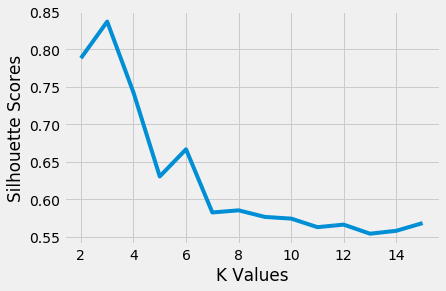

In [56]:
#Intialize range of cluster values from 2 to 16
cluster_range = range(2, 16)

#Intialize list to store silhouette scores
s_scores = []


#Iterate over cluster range, fit models and add score to s_scores

for cluster in cluster_range:
    model = KMeans(n_clusters = cluster)
    model.fit(X)
    score = silhouette_score(X, model.labels_)
    s_scores.append(score)
    
#Plot clusters versus scores

plt.plot(cluster_range, s_scores, linewidth = 4)
plt.xlabel("K Values")
plt.ylabel("Silhouette Scores")

In [ ]:
#3 K is at the peak

In [ ]:
#we can use something called Inertia to evaluate how internally coherent these clusters are!

Whats the best cluster value?

In [ ]:
#3? 

Elbow method cluster evaluation

In [57]:
#Call interia score on km5

km5.inertia_

5590433389062.8438

["Inertia, or the within-cluster sum of squares criterion (SSE), can be recognized as a measure of how internally coherent clusters are."](http://scikit-learn.org/stable/modules/clustering.html)

We're going to plot a range of cluster values versus the inertia score in order to determine the best cluster value using the "elbow method."

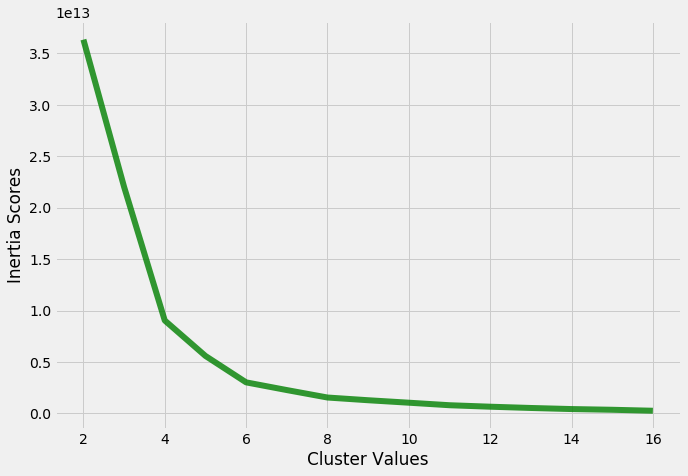

In [78]:
#Intialize range of cluster values from 2 to 16
cluster_range = range(2, 17)

#Intialize list to store inertia scores

i_scores = []

#Iterate over cluster range, fit models and add score to s_scores

for cluster in cluster_range:
    model = KMeans(n_clusters=cluster)
    model.fit(X)
    
    score = model.inertia_
    i_scores.append(score)
    
#Plot clusters versus scores

plt.figure(figsize=(10, 7))
plt.plot(cluster_range, i_scores, linewidth = 6, alpha = .8, c = "g")
plt.xlabel("Cluster Values")
plt.ylabel("Inertia Scores");

Where is the "elbow" in this chart? The elbow is where the best K value lies. 

Imagine the line as an arm.

In [ ]:
#we want to use the elbow of the graph, because at this point, the rate of decrease(negative slope) will slow...

In [ ]:
#the diminishing margin of returns 

Increasing K is always going to decrease the SSE, but what's the point of using a KMeans algorithm with 1000 K-value algorithm on a 1000 row dataset.

We want to choose a K that's at the beginning of the diminishing margin of returns.

### Scaling features and KMeans

We're going to demonstrate the need for scaling by clustering the data with all of the attributes

In [79]:
#Reassign X

X = df.copy()

Cluster with k = 3

In [80]:
#Intialize kmeans with 3 clusters and random_state = 10
km3 = KMeans(n_clusters=3)

#Fit model
km3.fit(X)

#Generate labels
labels = km3.labels_


#Value_counts
pd.value_counts(labels)

0    154
2      4
1      1
dtype: int64

In [ ]:
#Silhouette score
#eventhough we have a high silo score, this doesn't tell us much because there's one big clump of country types..

You can't really say that there are clusters here. Two-thirds of the clusters only account for 3 percent of the data. This is evidence of outliers skewing the dataset. So even though, we're producing a high silhouette score, this isn't much of a cluster analysis

In [ ]:
# let's use the scaled data now!

Let's go ahead and scale the data and refit a clustering algorithm

In [81]:
#Intialize scaler

scale = StandardScaler()
#Fit and transform scaler on data
Xs = scale.fit_transform(X)

#Intialize kmeans with 3 clusters and random_state = 10
kms3 = KMeans(n_clusters= 3, random_state= 10)

#Fit model
kms3.fit(Xs)

#Generate labels

labels = kms3.labels_

#Value_counts
pd.value_counts(labels)

0    85
1    49
2    25
dtype: int64

In [82]:
#Score

silhouette_score(Xs, labels)

0.25321740998862935

A lower score but not a good score.



In [ ]:
# it tells us that there's something there, but gives us a better understanding. 

In [ ]:
#what else can we do?

Let's go ahead and look at some of the countries in each cluster.

We're going randomly pick 10 countries from each cluster (0, 1, 2)

In [84]:
#Create dataframe with countries as indices and use labs3_s as the values

country_labels = pd.DataFrame(index = df.index, data = labels, columns = ["cluster"])
country_labels.head()

,cluster
CountryName,
Afghanistan,1
Albania,0
Algeria,0
Angola,1
Argentina,0


In [85]:
#Cluster 0, can we call them developing countries? 2nd world?
country_labels[country_labels.cluster == 0].sample(n = 10).index

Index([u'Bosnia and Herzegovina', u'Malaysia', u'Belize', u'Iraq',
       u'Nicaragua', u'Jamaica', u'Dominican Republic', u'Thailand', u'Cuba',
       u'Serbia'],
      dtype='object', name=u'CountryName')

In [86]:
#Cluster 1, poor? 3rd world?
country_labels[country_labels.cluster == 1].sample(n = 10).index

Index([u'Guinea-Bissau', u'Sudan', u'Ghana', u'Nigeria', u'Mauritania',
       u'Cambodia', u'Mozambique', u'Malawi', u'Nepal', u'Burundi'],
      dtype='object', name=u'CountryName')

In [87]:
#Cluster 2, developed world? 1st world?
country_labels[country_labels.cluster == 2].sample(n = 10).index

Index([u'Finland', u'United States', u'Luxembourg', u'Norway', u'Italy',
       u'Singapore', u'Japan', u'Iceland', u'New Zealand', u'Netherlands'],
      dtype='object', name=u'CountryName')

Let's make validation curves using both silhoeutte and inertia scores

Sihouette Score Plot:

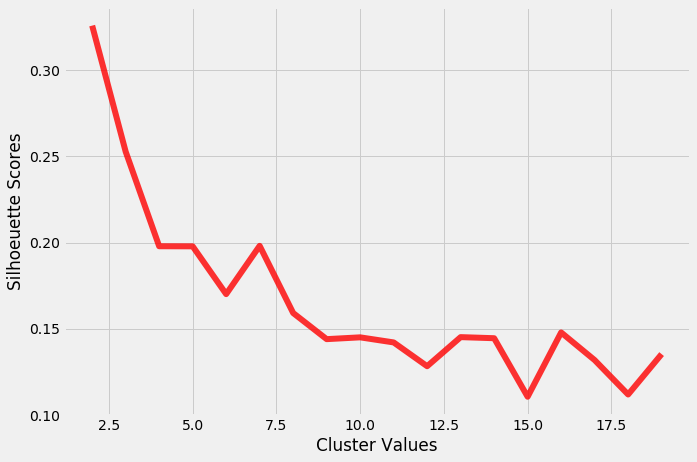

In [90]:
#what's the right K value for this dataset?

cluster_range = range(2, 20)

#Intialize list to store silhouette scores

s_scores = []

#Iterate over cluster range, fit models and add score to s_scores

for cluster in cluster_range:
    model = KMeans(n_clusters=cluster)
    model.fit(Xs)
    labels = model.labels_
    score = silhouette_score(Xs, labels)
    s_scores.append(score)
    
#Plot clusters versus scores

plt.figure(figsize=(10, 7))
plt.plot(cluster_range, s_scores, linewidth = 6, alpha = .8, c = "r")
plt.xlabel("Cluster Values")
plt.ylabel("Silhoeuette Scores");

Inertia Scores Plot:

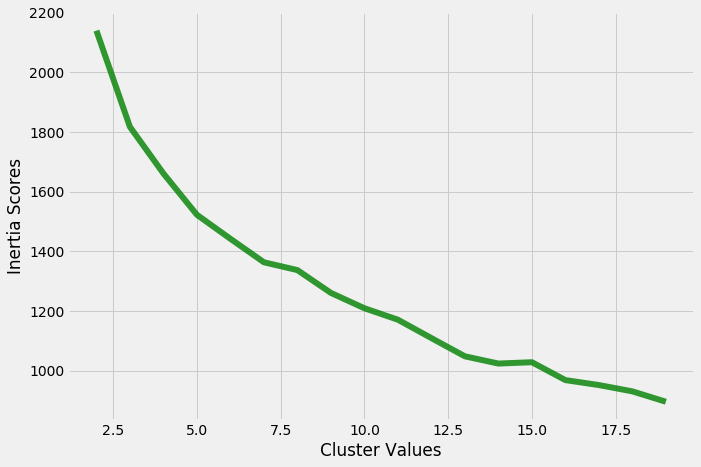

In [92]:
#Intialize range of cluster values from 2 to 16
cluster_range = range(2, 20)

#Intialize list to store inertia scores

i_scores = []

#Iterate over cluster range, fit models and add score to s_scores

for cluster in cluster_range:
    model = KMeans(n_clusters=cluster)
    model.fit(Xs)
    
    score = model.inertia_
    i_scores.append(score)
    
#Plot clusters versus scores

plt.figure(figsize=(10, 7))
plt.plot(cluster_range, i_scores, linewidth = 6, alpha = .8, c = "g")
plt.xlabel("Cluster Values")
plt.ylabel("Inertia Scores");

What's the ideal number of clusters? Which plot should we use to determine that ?

In [ ]:
#3 is hard to decide here because there is no sharp turn here. It's rather smooth.
#elbow method is hard to find the right answer.

**The hardest part of clustering is that it's hard to find the right answers!!**

# Resources:

**Kmeans:**

- https://kapilddatascience.wordpress.com/2015/09/06/introduction-to-k-means-clustering-part-1/
- http://fromdatawithlove.thegovans.us/2013/05/clustering-using-scikit-learn.html
- Great code walk through of clustering project:https://github.com/net70/KMeans-Clustering---Scikit-Learn/blob/master/KMeans%20Clustering%20-%20Scikit-Learn.ipynb
- My favorite tutorial: https://www.datascience.com/blog/k-means-clustering
- Really like this too: https://github.com/YuChunLOL/kmeans-dbscan-tutorial/blob/master/tutorial_and_labs/clustering-tutorial.ipynb


## Other types of clustering

**Hierarchical/Agglomerative**

- https://onlinecourses.science.psu.edu/stat505/node/143
- https://www.youtube.com/watch?v=XJ3194AmH40
- http://uc-r.github.io/hc_clustering (In R, but still a good resource)
- http://people.revoledu.com/kardi/tutorial/Clustering/index.html
- https://www.coursera.org/learn/cluster-analysis/lecture/LYX9a/4-2-agglomerative-clustering-algorithms
- https://blog.biolab.si/2015/12/02/hierarchical-clustering-a-simple-explanation/

**DBScan**

- https://blog.dominodatalab.com/topology-and-density-based-clustering/
- https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/
- https://www.slideshare.net/ssakpi/density-based-clustering

# In Class Lab

For the rest of class, I want you to work on clustering a dataset.

- I recommend picking any of the following datasets:
    - amazon_cities_data.csv, fifa_data.csv, mushrooms.csv, spotify_data.csv, Pokemon.csv, world-happiness-report folder, acs2015_county_data.csv, nba_player_stats.csv, diamonds.csv.
    - You can also use any of other supervised learning datasets we've used, just make sure to remove the target variable.
    
- Determine the right number of clusters using both silhouette score and elbow methods. Cluster using both scaled and unscaled versions of the data.

- Use EDA to learn about your clusters. Visualize the differences between thems. Don't just use the avearage attributes of each cluster's attributes.

- At the end of the class, each one of use will take 2-3 minutes to explain their clustering. Tell us what dataset you chose, how many clusters there are, and briefly describe the characteristics of each cluster.

In [2]:
path = "../data/nba_players_stats.csv"

#Load in data and assign it to df
df = pd.read_csv(path)

#Look at first five rows
df.head()

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384


In [3]:
df.shape

(490, 34)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 34 columns):
Name            490 non-null object
Games Played    490 non-null int64
MIN             490 non-null int64
PTS             490 non-null int64
FGM             490 non-null int64
FGA             490 non-null int64
FG%             490 non-null float64
3PM             490 non-null int64
3PA             490 non-null int64
3P%             490 non-null float64
FTM             490 non-null int64
FTA             490 non-null int64
FT%             490 non-null float64
OREB            490 non-null int64
DREB            490 non-null int64
REB             490 non-null int64
AST             490 non-null int64
STL             490 non-null int64
BLK             490 non-null int64
TOV             490 non-null int64
PF              490 non-null int64
EFF             490 non-null int64
AST/TOV         490 non-null float64
STL/TOV         490 non-null float64
Age             422 non-null float64
Birth_P

In [212]:
df.describe()

,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,BLK,TOV,PF,EFF,AST/TOV,STL/TOV,Age,Height,Weight,BMI
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000,490.000000,...,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,422.000000,422.000000,422.000000,422.000000
mean,53.014286,1214.714286,502.108163,188.338776,419.526531,43.099184,39.387755,112.52449,25.519184,86.042857,...,24.075510,68.826531,101.483673,564.330612,1.465837,0.626000,27.507109,197.440758,99.469194,25.427747
std,24.175437,820.570132,422.084232,156.265752,337.367125,9.625231,47.880909,127.38575,15.796603,91.315316,...,31.662852,58.480701,65.326807,464.428031,0.825037,0.367443,4.220603,8.740250,12.364228,1.715794
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,20.000000,172.500000,72.450000,20.411523
25%,33.000000,492.250000,145.250000,55.500000,139.000000,39.600000,1.000000,6.00000,15.500000,18.500000,...,5.000000,23.000000,45.500000,165.000000,0.920000,0.392500,24.000000,190.000000,90.000000,24.286136
50%,61.000000,1193.000000,423.000000,156.000000,357.500000,42.900000,18.000000,58.00000,31.300000,58.000000,...,14.000000,56.500000,103.000000,490.500000,1.345000,0.530000,27.000000,197.500000,99.000000,25.420833
75%,74.000000,1905.750000,774.000000,286.000000,642.750000,47.575000,66.000000,192.00000,36.400000,126.750000,...,29.750000,100.000000,148.750000,837.000000,1.920000,0.820000,30.000000,205.000000,108.000000,26.437500
max,83.000000,2981.000000,2217.000000,659.000000,1471.000000,100.000000,286.000000,646.00000,100.000000,715.000000,...,200.000000,321.000000,285.000000,2202.000000,6.500000,3.000000,39.000000,222.500000,162.000000,32.723141


In [5]:
df.columns 

Index([u'Name', u'Games Played', u'MIN', u'PTS', u'FGM', u'FGA', u'FG%',
       u'3PM', u'3PA', u'3P%', u'FTM', u'FTA', u'FT%', u'OREB', u'DREB',
       u'REB', u'AST', u'STL', u'BLK', u'TOV', u'PF', u'EFF', u'AST/TOV',
       u'STL/TOV', u'Age', u'Birth_Place', u'Birthdate', u'Collage',
       u'Experience', u'Height', u'Pos', u'Team', u'Weight', u'BMI'],
      dtype='object')

In [6]:
df.Pos.value_counts(dropna=False)

SG     100
PF      90
PG      84
SF      76
C       72
NaN     68
Name: Pos, dtype: int64

In [7]:
df.groupby("Pos").mean()

,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,BLK,TOV,PF,EFF,AST/TOV,STL/TOV,Age,Height,Weight,BMI
Pos,,,,,,,,,,,,,,,,,,,,,
C,56.125000,1262.694444,504.180556,204.541667,397.305556,51.506944,4.055556,12.444444,10.690278,91.041667,...,58.097222,73.166667,129.069444,731.111111,0.885417,0.440000,27.944444,207.951389,114.325000,26.442329
PF,53.877778,1163.144444,481.822222,188.288889,401.377778,44.816667,24.111111,71.644444,20.266667,81.133333,...,30.566667,57.033333,111.888889,595.133333,1.174111,0.640000,27.877778,203.527778,109.325000,26.408833
PG,53.702381,1312.750000,556.750000,202.845238,477.702381,39.730952,54.023810,156.678571,31.119048,97.035714,...,9.011905,94.369048,96.809524,592.547619,2.380952,0.545714,27.202381,185.386905,84.626786,24.628961
SF,54.671053,1274.921053,496.657895,179.828947,413.065789,40.734211,56.802632,159.289474,33.150000,80.197368,...,17.486842,59.802632,92.486842,522.223684,1.396711,0.793684,27.802632,199.967105,99.461842,24.882377
SG,51.260000,1233.240000,535.280000,192.050000,452.100000,40.122000,61.110000,169.460000,32.097000,90.070000,...,13.060000,67.700000,91.500000,495.840000,1.536300,0.696300,26.890000,192.600000,92.376000,24.899732


In [220]:
non_numerics = [x for x in df.columns \
                if not (df[x].dtype == np.float64 \
                        or df[x].dtype == np.int64)]
numerics = [x for x in df.columns if x not in non_numerics]

In [8]:
#hand picked. all numerical data, and dropped redundancies in metrics such as 3pa, and FTA etc..
subset = [u'Name', u'Games Played', u'MIN', u'PTS', u'FG%', u'3P%', u'FT%', u'OREB', u'DREB',
       u'REB', u'AST', u'STL', u'BLK', u'TOV', u'PF', u'EFF', u'AST/TOV',
       u'STL/TOV', u'Height', u'Weight', u'BMI']

In [9]:
df2 = df[subset]

In [223]:
df2.dropna(inplace= True)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422 entries, 0 to 489
Data columns (total 21 columns):
Name            422 non-null object
Games Played    422 non-null int64
MIN             422 non-null int64
PTS             422 non-null int64
FG%             422 non-null float64
3P%             422 non-null float64
FT%             422 non-null float64
OREB            422 non-null int64
DREB            422 non-null int64
REB             422 non-null int64
AST             422 non-null int64
STL             422 non-null int64
BLK             422 non-null int64
TOV             422 non-null int64
PF              422 non-null int64
EFF             422 non-null int64
AST/TOV         422 non-null float64
STL/TOV         422 non-null float64
Height          422 non-null float64
Weight          422 non-null float64
BMI             422 non-null float64
dtypes: float64(8), int64(12), object(1)
memory usage: 72.5+ KB


/Users/darrenklee/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [224]:
X = df2
X.set_index("Name", inplace= True)

#Intialize scaler
ss = StandardScaler()

#Fit and transform scaler on data
Xs = ss.fit_transform(X)


In [225]:
km5 = KMeans(n_clusters= 5, random_state = 10)

#Fit model on X
km5.fit(Xs)

#Generate labels

##Method 1
labs5_s = km5.labels_
##Method 2
labs5_s = km5.predict(Xs)

#Value_counts
pd.value_counts(labs5_s)

2    107
1    104
0     94
3     75
4     42
dtype: int64

In [228]:
#Cluster centriods

km5.cluster_centers_[0]

array([ 0.48110842,  0.1287344 , -0.01458619,  0.39175341, -0.22760551,
       -0.01369619,  0.40135408,  0.3259648 ,  0.36158723, -0.30617316,
       -0.09712971,  0.27779036, -0.07845276,  0.44509644,  0.08258191,
       -0.38886771, -0.05330832,  0.62827537,  0.70822151,  0.498375  ])

In [231]:
#Add labels to the dataframe

df2["labs5_s"] = labs5_s

df2.groupby("labs5_s").mean()

/Users/darrenklee/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Games Played,MIN,PTS,FG%,3P%,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,EFF,AST/TOV,STL/TOV,Height,Weight,BMI
labs5_s,,,,,,,,,,,,,,,,,,,,
0,65.297872,1352.414894,509.680851,46.667021,22.432979,70.432979,79.936170,213.170213,293.106383,76.244681,36.500000,33.478723,65.723404,132.393617,619.925532,1.175532,0.608404,202.925532,108.215426,26.281842
1,72.298077,2090.442308,941.846154,43.404808,34.759615,78.906731,45.605769,210.951923,256.557692,265.875000,76.826923,19.903846,133.153846,146.586538,946.346154,1.981154,0.622212,191.225962,91.150962,24.896993
2,40.560748,677.831776,234.355140,39.230841,32.200935,77.450467,16.028037,64.439252,80.467290,63.084112,22.579439,6.084112,32.616822,53.476636,237.663551,1.915701,0.812523,192.079439,90.588785,24.533429
3,20.840000,222.693333,68.480000,38.942667,13.130667,50.542667,14.146667,32.226667,46.373333,10.173333,5.266667,6.426667,12.133333,27.586667,82.240000,0.806800,0.472267,201.333333,104.886000,25.818108
4,74.333333,2198.166667,991.238095,51.623810,18.638095,69.716667,195.047619,460.357143,655.404762,140.738095,60.500000,94.666667,124.214286,195.071429,1356.142857,1.123095,0.495476,207.261905,113.442857,26.411754


In [232]:
#Score
silhouette_score(Xs, labs5_s)

0.1850411124565127

In [294]:
#Create dataframe with countries as indices and use labs3_s as the values

player_labels = pd.DataFrame(index=df2.index, data=labs5_s, columns=["cluster"])

player_labels[50:60]

,cluster
Name,
Brook Lopez,4
Bruno Caboclo,3
Bryce Cotton,2
C.J. Watson,1
Cameron Bairstow,3
Carl Landry,0
Carlos Boozer,0
Carmelo Anthony,0
Caron Butler,0


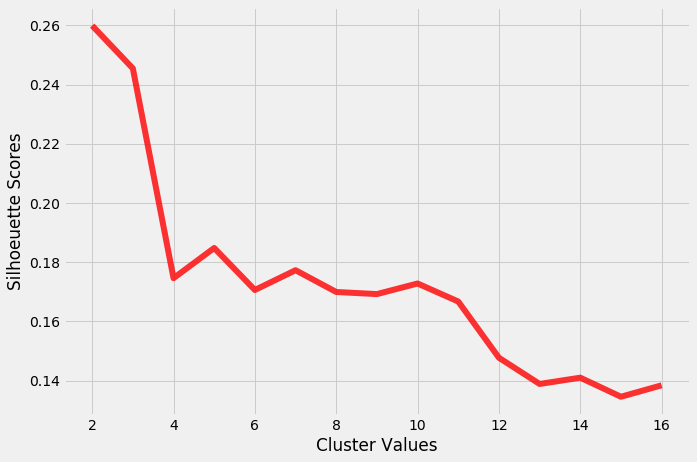

In [239]:
#Intialize range of cluster values from 2 to 16
cluster_range = range(2, 17)

#Intialize list to store silhouette scores

s_scores = []

#Iterate over cluster range, fit models and add score to s_scores

for cluster in cluster_range:
    model = KMeans(n_clusters=cluster)
    model.fit(Xs)
    labels = model.labels_
    score = silhouette_score(Xs, labels)
    s_scores.append(score)
    
#Plot clusters versus scores

plt.figure(figsize=(10, 7))
plt.plot(cluster_range, s_scores, linewidth = 6, alpha = .8, c = "r")
plt.xlabel("Cluster Values")
plt.ylabel("Silhoeuette Scores");

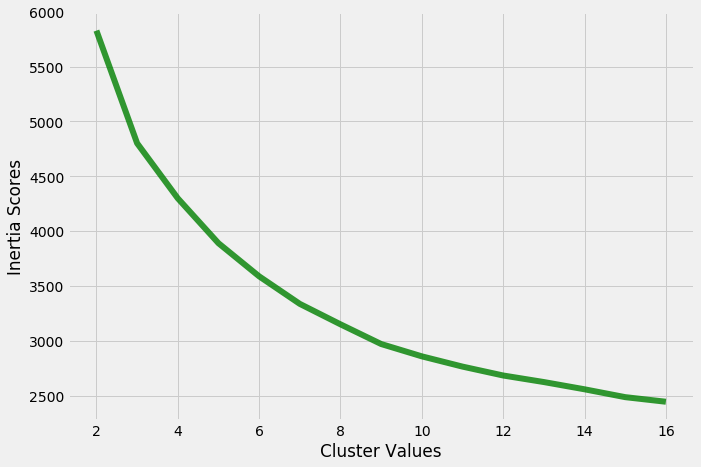

In [238]:
#Intialize range of cluster values from 2 to 16
cluster_range = range(2, 17)

#Intialize list to store inertia scores

i_scores = []

#Iterate over cluster range, fit models and add score to s_scores

for cluster in cluster_range:
    model = KMeans(n_clusters=cluster)
    model.fit(Xs)
    
    score = model.inertia_
    i_scores.append(score)
    
#Plot clusters versus scores

plt.figure(figsize=(10, 7))
plt.plot(cluster_range, i_scores, linewidth = 6, alpha = .8, c = "g")
plt.xlabel("Cluster Values")
plt.ylabel("Inertia Scores");

In [306]:
#cluster 0, F/C. "The Average Big"
player_labels[player_labels.cluster == 0].sample(n=10).index

Index([u'Nene', u'Marvin Williams', u'Kyle Singler', u'Jared Dudley',
       u'Robin Lopez', u'Mike Dunleavy', u'Anthony Bennett', u'Meyers Leonard',
       u'Drew Gooden', u'Pero Antic'],
      dtype='object', name=u'Name')

In [307]:
"Dwight Howard" in player_labels[player_labels.cluster == 0].index

True

In [317]:
#cluster 1, Highest in assists and steals. "High Performance guards"
player_labels[player_labels.cluster == 1].sample(n=10).index

Index([u'Mo Williams', u'Anthony Morrow', u'Victor Oladipo', u'Dante Exum',
       u'Joe Ingles', u'LeBron James', u'Terrence Ross', u'Jamal Crawford',
       u'Jameer Nelson', u'Klay Thompson'],
      dtype='object', name=u'Name')

In [275]:
"Stephen Curry" in player_labels[player_labels.cluster == 1].index

True

In [314]:
#cluster 2, Largest Cluster. "The Role Player" 
player_labels[player_labels.cluster == 2].sample(n=10).index

Index([u'Jorge Gutierrez', u'Tim Frazier', u'Raymond Felton', u'Landry Fields',
       u'Nik Stauskas', u'Lester Hudson', u'Tyler Ennis', u'Jannero Pargo',
       u'CJ McCollum', u'Mike Miller'],
      dtype='object', name=u'Name')

In [301]:
#cluster 3, Lowest ranked in majority of categories, especially games played and minutes! "The Bench Warmers"
player_labels[player_labels.cluster == 3].sample(n=10).index

Index([u'Brandon Rush', u'Vander Blue', u'Andre Dawkins', u'Elton Brand',
       u'Greg Smith', u'DeJuan Blair', u'Arinze Onuaku', u'Jeff Adrien',
       u'Johnny O'Bryant III', u'Josh McRoberts'],
      dtype='object', name=u'Name')

In [302]:
#cluster 4, F/C? Highest in Blocks FG% and Rebounds. "High Performance Bigs"
player_labels[player_labels.cluster == 4].sample(n=10).index

Index([u'Kevin Love', u'Mason Plumlee', u'Serge Ibaka', u'DeAndre Jordan',
       u'Al Horford', u'Tyson Chandler', u'Timofey Mozgov',
       u'DeMarcus Cousins', u'Steven Adams', u'Jordan Hill'],
      dtype='object', name=u'Name')

In [284]:
df2.groupby("labs5_s").mean()

,Games Played,MIN,PTS,FG%,3P%,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,EFF,AST/TOV,STL/TOV,Height,Weight,BMI
labs5_s,,,,,,,,,,,,,,,,,,,,
0,65.297872,1352.414894,509.680851,46.667021,22.432979,70.432979,79.936170,213.170213,293.106383,76.244681,36.500000,33.478723,65.723404,132.393617,619.925532,1.175532,0.608404,202.925532,108.215426,26.281842
1,72.298077,2090.442308,941.846154,43.404808,34.759615,78.906731,45.605769,210.951923,256.557692,265.875000,76.826923,19.903846,133.153846,146.586538,946.346154,1.981154,0.622212,191.225962,91.150962,24.896993
2,40.560748,677.831776,234.355140,39.230841,32.200935,77.450467,16.028037,64.439252,80.467290,63.084112,22.579439,6.084112,32.616822,53.476636,237.663551,1.915701,0.812523,192.079439,90.588785,24.533429
3,20.840000,222.693333,68.480000,38.942667,13.130667,50.542667,14.146667,32.226667,46.373333,10.173333,5.266667,6.426667,12.133333,27.586667,82.240000,0.806800,0.472267,201.333333,104.886000,25.818108
4,74.333333,2198.166667,991.238095,51.623810,18.638095,69.716667,195.047619,460.357143,655.404762,140.738095,60.500000,94.666667,124.214286,195.071429,1356.142857,1.123095,0.495476,207.261905,113.442857,26.411754


In [298]:
df2.labs5_s.value_counts()

2    107
1    104
0     94
3     75
4     42
Name: labs5_s, dtype: int64

In [299]:
df2.corr()["EFF"].sort_values(ascending = False)

EFF             1.000000
PTS             0.941144
MIN             0.923504
DREB            0.900163
REB             0.862152
TOV             0.859910
PF              0.821672
STL             0.787014
Games Played    0.753495
AST             0.690434
OREB            0.678439
BLK             0.636472
FG%             0.418778
FT%             0.279047
3P%             0.167843
Weight          0.163886
BMI             0.140113
AST/TOV         0.136235
Height          0.121254
labs5_s        -0.069885
STL/TOV        -0.098526
Name: EFF, dtype: float64

In [345]:
c_range = range(0, 5)
yes = []
for i in c_range:
    w = "LeBron James" in player_labels[player_labels.cluster == i].index
    yes.append(w)
print yes

[False, True, False, False, False]


In [394]:
import seaborn as sns

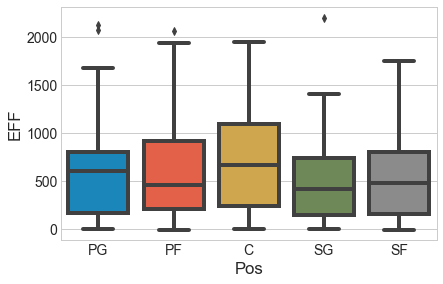

In [395]:
sns.set_style(style = "whitegrid", )
sns.boxplot(x = "Pos", y = "EFF", data = df)

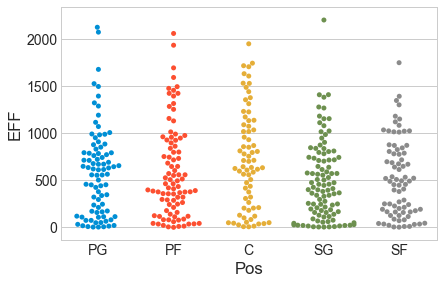

In [396]:
sns.swarmplot(x = "Pos", y = "EFF", data = df);

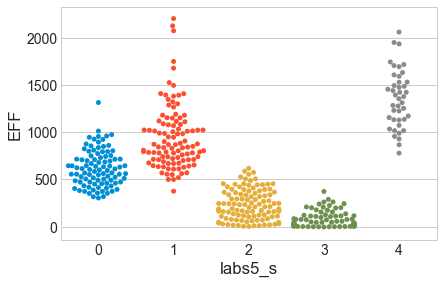

In [399]:
sns.swarmplot(x = "labs5_s", y = "EFF", data = df2);

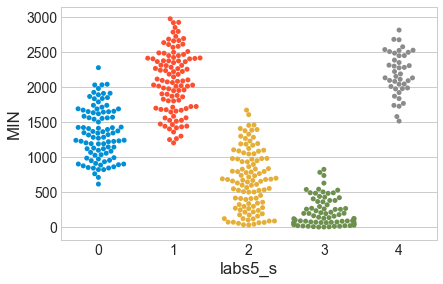

In [401]:
sns.swarmplot(x = "labs5_s", y = "MIN", data = df2);

In [1]:
df2.columns

NameError: name 'df2' is not defined

In [ ]:
test = df2[""]

In [ ]:
sns.pairplot(test, hue = "EFF");

In [ ]:
#when you have datasets with more than 10K rows!

from sklearn.cluster import MiniBatchKMeans